回归方程的参数=== [1.41593242 6.04962493]


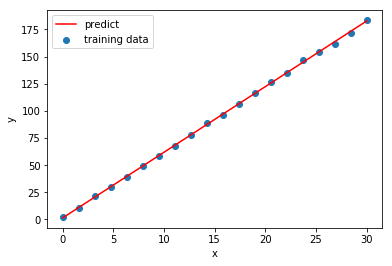

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.030e+04
Date:                Fri, 30 Aug 2019   Prob (F-statistic):           8.75e-34
Time:                        22:28:25   Log-Likelihood:                -25.853
No. Observations:                  20   AIC:                             55.71
Df Residuals:                      18   BIC:                             57.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4159      0.400      3.537      0.002       0.575       2.257
x1             6.0496      0.023    265.145      0.000       6.002       6.098
==============================================================================
Omnibus:                        0.188   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.910   Jarque-Bera (JB):                0.085
Skew:                           0.120   Prob(JB):                        0.958
Kurtosis:                       2.790   Cond. No.                         33.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2]:
#调用库
import statsmodels.api as sm #最小二乘
import numpy as np      #numpy库
import matplotlib.pyplot as plt  #导入图形展示库

#设回归公式是: Y=2+6*x
#1、设定数据量
nsample=20
#2、创建一个表示x的array。这里，设x的值从 0到 30 等差排列，共20个数。
x=np.linspace(0,30, nsample)
#3、使用 sm.add_constant() 在原始数据前加一列常项1。
x=sm.add_constant(x) 
#4、设置模型里的 β0,β1，这里要设置成2和6。
beta=np.array([2,6])  #β0, β1分别为2和6
#5、误差分析，在数据中加上误差项，所以生成一个长度为k的正态分布样本。
e=np.random.normal(size=nsample)
#6、产生因变量y的实际值
y=np.dot(x,beta)+e     #回归公式是: Y=2+6*x+ e
#7、创建模型（利用最小二乘法）
model=sm.OLS(y,x)
#8、训练模型
res=model.fit()
#9、获取结果，输出图形
#调取计算出的拟合回归模型参数即回归系数
print("回归方程的参数===",res.params)
#调用拟合结果的 fittedvalues 得到预测值y_pred值
y_pred=res.fittedvalues     
#将拟合结果画出来
fig,ax=plt.subplots()
ax.scatter(x[:,-1],y,label="training data")
ax.plot(x[:,-1],y_pred,'r',label='predict')
ax.legend()
ax.set(xlabel='x',ylabel='y')
plt.show()
#将回归拟合的摘要全部打印出来
res.summary()


回归方程的参数=== [2.80486093 6.04147167 1.99946408]


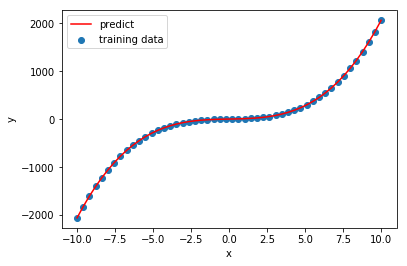

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.876e+07
Date:                Fri, 30 Aug 2019   Prob (F-statistic):          1.99e-139
Time:                        22:28:51   Log-Likelihood:                -67.534
No. Observations:                  50   AIC:                             141.1
Df Residuals:                      47   BIC:                             146.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8049      0.136     20.587      0.000       2.531       3.079
x1             6.0415      0.058    104.330      0.000       5.925       6.158
x2             1.9995      0.001   2350.814      0.000       1.998       2.001
==============================================================================
Omnibus:                        0.539   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.764   Jarque-Bera (JB):                0.365
Skew:                          -0.207   Prob(JB):                        0.833
Kurtosis:                       2.939   Cond. No.                         401.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
#调用
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table 
#回归公式是: y=3+6x+2x^3+e
#1、设定数据量
nsample=50
#2、创建一个表示x的array。这里，设x的值是-10到 10 等差排列，共50个数。
x=np.linspace(-10,10, nsample)
X=np.column_stack((x,x**3))
#3、使用 sm.add_constant() 在 array 上加入一列常项1。
X=sm.add_constant(X) #线性组合，在原始数据前加1
#4、设置模型里的 β0,β1，β2，这里要设置成3、6和2。
beta=np.array([3,6,2])  #β0, β1,β2分别为3、6和2
#5、误差分析，在数据中加上误差项。
e=np.random.normal(size=nsample)
#6、实际值y
y=np.dot(X,beta)+e     #回归公式是: y=3+6x+2x^3+e
#7、最小二乘法
model=sm.OLS(y,X)
#8、拟合数据
res=model.fit()
#9、获取结果，输出图形
#调取计算出的拟合回归模型参数即回归系数
print("回归方程的参数===",res.params)
#调用拟合结果的 fittedvalues 得到拟合的y_pred值
y_pred=res.fittedvalues     
#将拟合结果画出来
fig,ax=plt.subplots()
ax.scatter(x,y,label="training data")
ax.plot(x,y_pred,'r',label='predict')
ax.legend()
ax.set(xlabel='x',ylabel='y')
plt.show()
#将回归拟合的摘要全部打印出来
res.summary()


In [6]:
# 导入相关库
import numpy as np  #numpy库
import pandas as pd  #panda库
#导入数据可视化包及缺失值处理相关的工具包data visualization and missing values
import matplotlib.pyplot as plt   #导入图形展示库
import seaborn as sns     # seaborn库
%matplotlib inline 
#导入缺失值处理的库
import missingno as msno    # 缺失值
#机器学习的工具包machine learning
from sklearn.preprocessing import StandardScaler    #标准化库
from sklearn.model_selection import train_test_split, cross_val_score
# 获取数据
data = pd.read_csv("E:/python编书/数据集/insurance.csv")
#查看数据大小
data.shape


(1338, 7)

In [7]:
# 查看数据的列名
data.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
#查看数据类型
data.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
#生成描述性统计
data.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


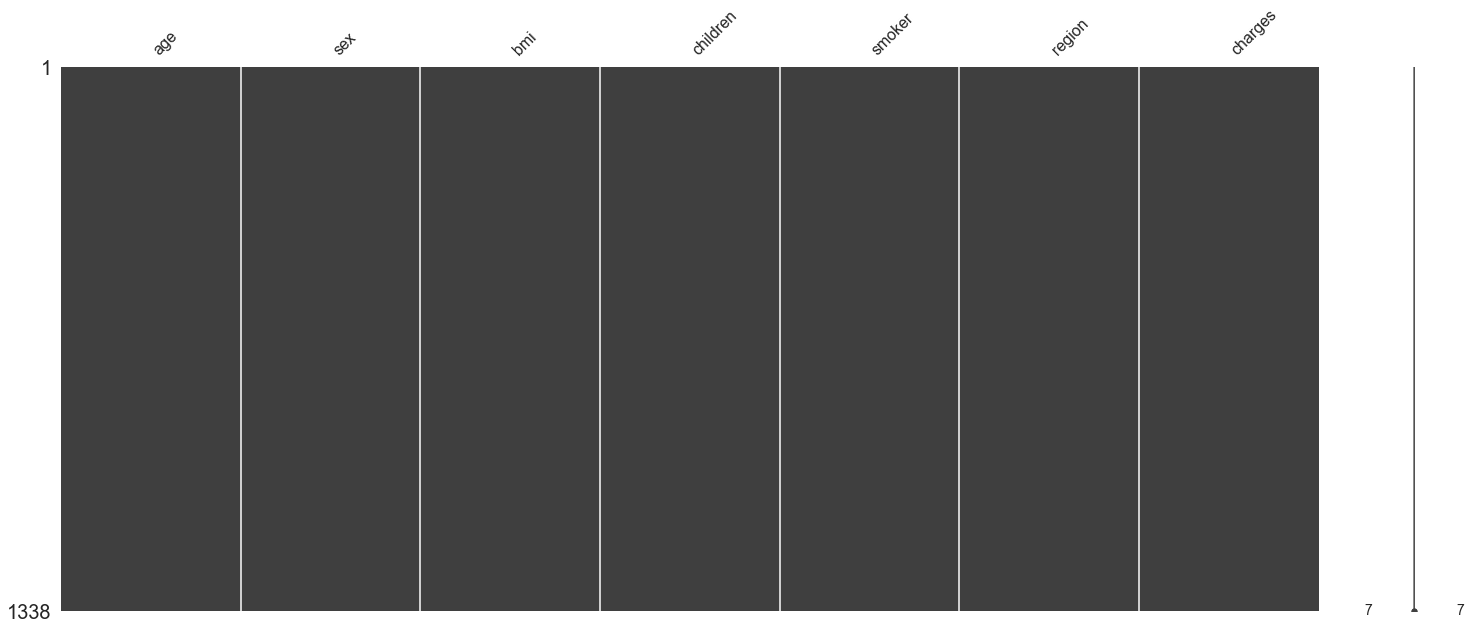

In [10]:
#可视化缺失值
sns.set(style = "ticks")  #设置sns的样式背景
msno.matrix(data)

In [11]:
#将是否吸烟者的值映射为数值，yes对应数值1，no对应数值0
smoker_Dict={'yes':1,'no':0}
data['smoker']=data['smoker'].map(smoker_Dict)
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [12]:
#将性别的值映射为数值，男（male）对应数值1，女（female）对应数值0
sex_Dict={'female':0,'male':1}
data['sex']= data['sex'].map(sex_Dict)
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [13]:
classes = ['region']
# 将数据转化成独热编码, 即对非数值类型的字符进行分类转换成数字。用0-1表示，这就将许多指标划分成若干子列
dummies = pd.get_dummies(data[classes])
#将分类处理后的数据列添加进列表中同时删除处理前的列，
# 采用这种方式的好处：每列的名称不是无意义的
data=data.join(dummies).drop(classes, axis = 1)
# 新数据集
print('汇总:', data.shape)
data.head()


汇总: (1338, 10)


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [14]:
#筛选出数据类型不是字符型的列
num = ['age', 'bmi', 'children']
standard_scaler = StandardScaler()
data[num] = standard_scaler.fit_transform(data[num])
data.head(10)


D:\Program Files (x86)\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Program Files (x86)\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,-0.908614,1,16884.92400,0,0,0,1
1,-1.509965,1,0.509621,-0.078767,0,1725.55230,0,0,1,0
2,-0.797954,1,0.383307,1.580926,0,4449.46200,0,0,1,0
3,-0.441948,1,-1.305531,-0.908614,0,21984.47061,0,1,0,0
4,-0.513149,1,-0.292556,-0.908614,0,3866.85520,0,1,0,0
5,-0.584350,0,-0.807656,-0.908614,0,3756.62160,0,0,1,0
6,0.483668,0,0.455486,-0.078767,0,8240.58960,0,0,1,0
7,-0.157143,0,-0.479567,1.580926,0,7281.50560,0,1,0,0
8,-0.157143,1,-0.136714,0.751079,0,6406.41070,1,0,0,0
9,1.480485,0,-0.791252,-0.908614,0,28923.13692,0,1,0,0


In [15]:
cormatrix = data.corr()
print("相关矩阵:\n",cormatrix)
# 转化为一维表
#返回函数的上三角矩阵，把对角线上的置0，让他们不是最高的。
#np.tri()生成下三角矩阵，k=-1即对角线向下偏移一个单位，对角线及以上元素全都置零
#.T矩阵转置，下三角矩阵转置变成上三角矩阵
cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T  
print("相关矩阵的上三角表示:\n",cormatrix)
cormatrix = cormatrix.stack()#利用stack()进行数据重排，stack以列为索引进行堆积
print("相关矩阵：\n",cormatrix )
#返回某个变量和其他变量的相关性
#reindex(新索引)：按新索引排序；abs():返回绝对值；sort_values()：排序，ascending=False：升序，默认true：升序；reset_index()：将行索引转为新列的值，并命名level_
cormatrix = cormatrix.reindex(cormatrix.sort_values(ascending=False).index).reset_index()
cormatrix.columns = ["第一个变量", "第二个变量", "相关性"]
cormatrix.head(20)


相关矩阵:
                        age       sex       bmi  children    smoker   charges  \
age               1.000000 -0.020856  0.109272  0.042469 -0.025019  0.299008   
sex              -0.020856  1.000000  0.046371  0.017163  0.076185  0.057292   
bmi               0.109272  0.046371  1.000000  0.012759  0.003750  0.198341   
children          0.042469  0.017163  0.012759  1.000000  0.007673  0.067998   
smoker           -0.025019  0.076185  0.003750  0.007673  1.000000  0.787251   
charges           0.299008  0.057292  0.198341  0.067998  0.787251  1.000000   
region_northeast  0.002475 -0.002425 -0.138156 -0.022808  0.002811  0.006349   
region_northwest -0.000407 -0.011156 -0.135996  0.024806 -0.036945 -0.039905   
region_southeast -0.011642  0.017117  0.270025 -0.023066  0.068498  0.073982   
region_southwest  0.010016 -0.004184 -0.006205  0.021914 -0.036945 -0.043210   

                  region_northeast  region_northwest  region_southeast  \
age                       0.002475    

,第一个变量,第二个变量,相关性
0,smoker,charges,0.787251
1,age,charges,0.299008
2,bmi,region_southeast,0.270025
3,bmi,charges,0.198341
4,age,bmi,0.109272
5,sex,smoker,0.076185
6,charges,region_southeast,0.073982
7,smoker,region_southeast,0.068498
8,children,charges,0.067998
9,sex,charges,0.057292


In [16]:
#查看各个特征与charges的相关系数
cormatrix2 = data.corr()
cormatrix2['charges'].sort_values(ascending =False)#特征选择


charges             1.000000
smoker              0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex                 0.057292
region_northeast    0.006349
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64

In [17]:
data_X= pd.concat([data['smoker'],data['age'],data['bmi'],data['region_southeast'],
                data['children'],data['sex'],data['charges']],axis=1)
data_X.head()


,smoker,age,bmi,region_southeast,children,sex,charges
0,1,-1.438764,-0.453320,0,-0.908614,0,16884.92400
1,0,-1.509965,0.509621,1,-0.078767,1,1725.55230
2,0,-0.797954,0.383307,1,1.580926,1,4449.46200
3,0,-0.441948,-1.305531,0,-0.908614,1,21984.47061
4,0,-0.513149,-0.292556,0,-0.908614,1,3866.85520


In [18]:
# 分离因变量
target = data_X.charges
# 分离自变量
features = data_X.drop(columns=['charges'])


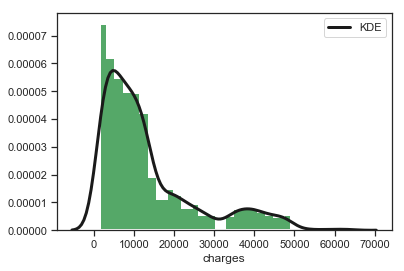

In [19]:
# 分析医疗费用的分布是否符合正态
x = target
sns.distplot(x, hist=True, kde=True, kde_kws={"color": "k", "lw": 3, "label": "KDE"},
          hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "color": "g"})


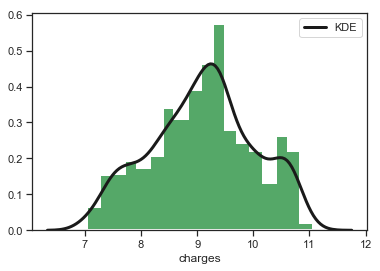

In [20]:
target=np.log1p(target)
# 分析医疗费用的分布是否符合正态
x = target
sns.distplot(x, hist=True, kde=True, kde_kws={"color": "k", "lw": 3, "label": "KDE"},
          hist_kws={"histtype": "stepfilled", "linewidth": 3, "alpha": 1, "color": "g"})


In [21]:
#划分数据集，sklearn.model_selection.train_test_split随机划分训练集和测试集
seed=123   #随机种子数
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3,
                                  random_state = seed)#设置70%为训练数据
print("训练集", X_train.shape, "，测试集", X_test.shape)


训练集 (936, 6) ，测试集 (402, 6)


In [22]:
#第1步：导入线性回归
from sklearn.linear_model import LinearRegression
# 第2步：创建模型：线性回归
model = LinearRegression()
#第3步：训练模型
model.fit(X_train,y_train)
#获得线性回归模型的参数
a=model.intercept_#截距
b=model.coef_#回归系数
print("最佳拟合线:截距",a,"\n回归系数：",b)


最佳拟合线:截距 8.851551231348216 
回归系数： [ 1.53318059  0.48875255  0.08953472 -0.07628352  0.1276445  -0.08411224]


In [23]:
#对线性回归进行预测
y_pred = model.predict(X_test)
#评价回归模型
score=model.score(X_test, y_test)  #查看判定系数的方法一
print("个人医保数据线性回归模型的决定系数即R平方为：",score)
from sklearn.metrics import explained_variance_score,mean_absolute_error,\
mean_squared_error,median_absolute_error,r2_score
print("个人医保数据线性回归模型的平均绝对误差为：",mean_absolute_error(y_test,y_pred))
print("个人医保数据线性回归模型的均方误差MSE为：", mean_squared_error(y_test,y_pred))
print("个人医保数据线性回归模型的中值绝对误差为：",median_absolute_error(y_test,y_pred))
print("个人医保数据线性回归模型的可解释方差值为：", explained_variance_score(y_test,y_pred))
#查看判定系数的方法二
print("个人医保数据线性回归模型的判定系数即R平方为：",r2_score(y_test,y_pred))


个人医保数据线性回归模型的决定系数即R平方为： 0.7830070691295015
个人医保数据线性回归模型的平均绝对误差为： 0.2707571270860691
个人医保数据线性回归模型的均方误差MSE为： 0.17131210181347262
个人医保数据线性回归模型的中值绝对误差为： 0.14746506518623992
个人医保数据线性回归模型的可解释方差值为： 0.7831735070420169
个人医保数据线性回归模型的判定系数即R平方为： 0.7830070691295015


In [24]:
# 交叉验证
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(model,features, target,cv=10)
#获得线性回归模型的参数
a=model.intercept_#截距
b=model.coef_#回归系数
print("最佳拟合线:截距",a,"\n回归系数：",b)
print("个人医保数据线性回归模型的平均绝对误差为：",mean_absolute_error(target,predicted))
print("个人医保数据线性回归模型的均方误差MSE为：", mean_squared_error(target,predicted))
print("个人医保数据线性回归模型的中值绝对误差为：",median_absolute_error(target,predicted))
print("个人医保数据线性回归模型的可解释方差值为：",
explained_variance_score(target,predicted))
print("个人医保数据线性回归模型的判定系数即R平方为：",r2_score(target,predicted))


最佳拟合线:截距 8.851551231348216 
回归系数： [ 1.53318059  0.48875255  0.08953472 -0.07628352  0.1276445  -0.08411224]
个人医保数据线性回归模型的平均绝对误差为： 0.2815407634403475
个人医保数据线性回归模型的均方误差MSE为： 0.20010936615767003
个人医保数据线性回归模型的中值绝对误差为： 0.13490158250103956
个人医保数据线性回归模型的可解释方差值为： 0.7630797649634314
个人医保数据线性回归模型的判定系数即R平方为： 0.7630793987615034
